In [1]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#Training Set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
#Test Set

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

#full connection
# Adding the First hidden layer
from keras.layers import Dense
cnn.add(Dense(units=128, activation='relu'))

#output layer
cnn.add(Dense(units=1, activation='sigmoid'))

# Compiling the cnn
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Training the cnn on the Training set and  evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)


Mounted at /content/drive
Found 8000 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 3647s 15s/step - loss: 0.6857 - accuracy: 0.5537 - val_loss: 0.6574 - val_accuracy: 0.6132
Epoch 2/25
250/250 [==============================] - 95s 380ms/step - loss: 0.6458 - accuracy: 0.6334 - val_loss: 0.6454 - val_accuracy: 0.6342
Epoch 3/25
250/250 [==============================] - 103s 413ms/step - loss: 0.5917 - accuracy: 0.6846 - val_loss: 0.5582 - val_accuracy: 0.7306
Epoch 4/25
250/250 [==============================] - 103s 413ms/step - loss: 0.5512 - accuracy: 0.7200 - val_loss: 0.5413 - val_accuracy: 0.7346
Epoch 5/25
250/250 [==============================] - 94s 376ms/step - loss: 0.5280 - accuracy: 0.7314 - val_loss: 0.5158 - val_accuracy: 0.7521
Epoch 6/25
250/250 [==============================] - 102s 408ms/step - loss: 0.5002 - accuracy: 0.7560 - val_loss: 0.5124 - val_accuracy: 0.7501
Epoch 7/25
250/25

1/1 [==============================] - 0s 22ms/step


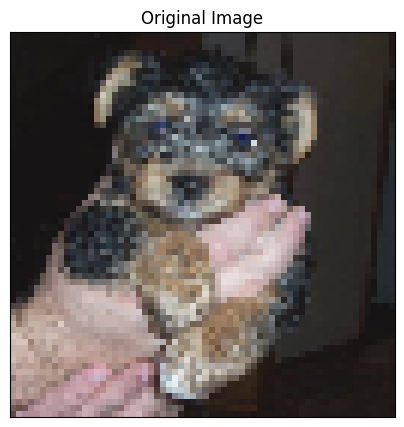

dog


In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

test_image1 = image.load_img('/content/drive/MyDrive/dog.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1), plt.imshow(test_image1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()
print(prediction)